In [3]:
import glob
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

gloober = glob.glob("grid_search12/*")



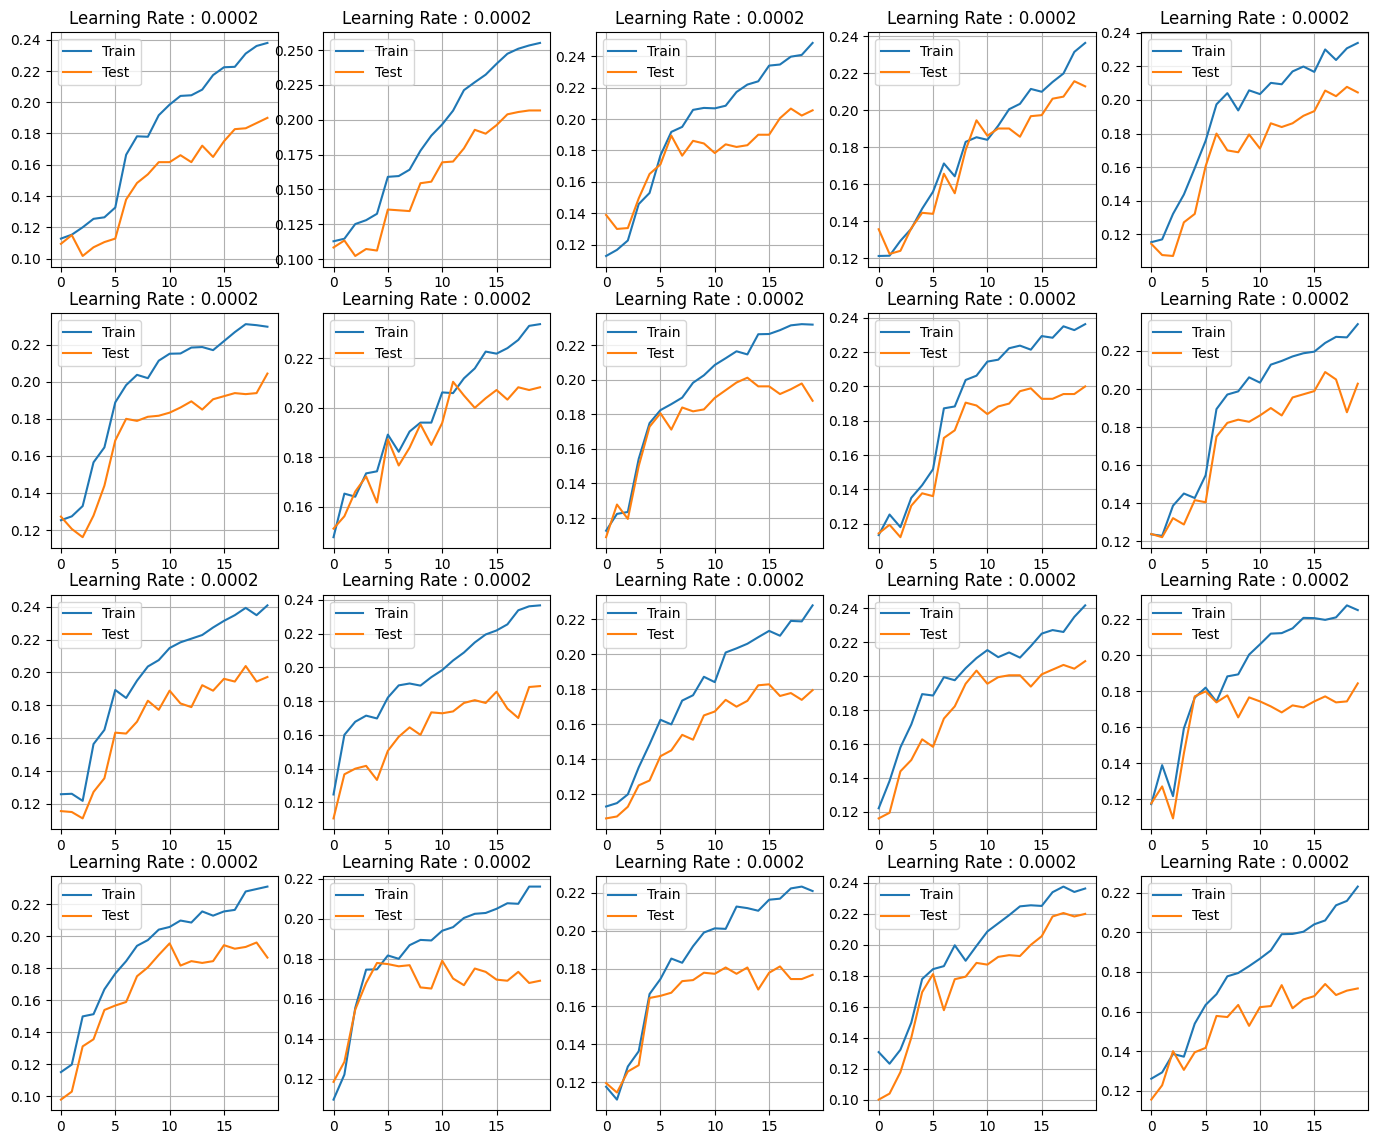

In [21]:
figs, axs = plt.subplots(4,5, figsize=(17,14))

best_acc_yet = [0,0] #(accuracy, glob)

for idx, glob in enumerate(gloober):
    with open(glob, "rb") as f:
        results = pkl.load(f)
        axs[idx//5, idx%5].plot(results["Accuracy Measurements"]["Training accuracy"], label="Train")
        axs[idx//5, idx%5].plot(results["Accuracy Measurements"]["Testing accuracy"], label="Test")
        axs[idx//5, idx%5].grid()
        axs[idx//5, idx%5].set_title(f"Learning Rate : {results['Learning Schedule']['Learning_rate']}")
        axs[idx//5, idx%5].legend()
        if np.max(results["Accuracy Measurements"]["Testing accuracy"]) > best_acc_yet[0]:
                best_acc_yet[0] = np.max(results["Accuracy Measurements"]["Testing accuracy"])
                best_acc_yet[1] = glob

plt.savefig("The_different_rates.pdf")

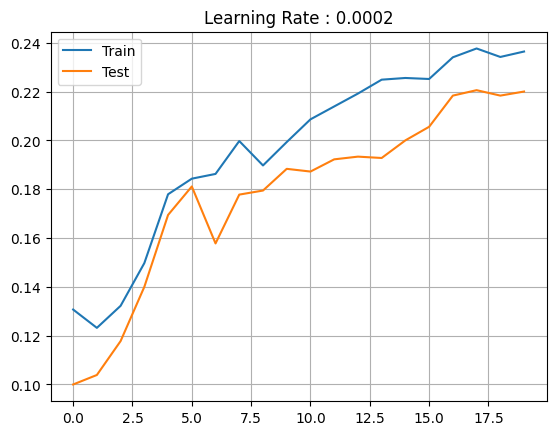

In [22]:
fig, ax = plt.subplots()

with open(best_acc_yet[1], "rb") as f:
    results = pkl.load(f)
    ax.plot(results["Accuracy Measurements"]["Training accuracy"], label="Train")
    ax.plot(results["Accuracy Measurements"]["Testing accuracy"], label="Test")
    ax.grid()
    ax.set_title(f"Learning Rate : {results['Learning Schedule']['Learning_rate']}")
    ax.legend()

plt.savefig("test_best_accuracy.pdf")
    